In [ ]:
# convert the csv file to parquet file

from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import *
import pyspark.sql.functions as f
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName('MSD').getOrCreate()

file = "hdfs:/user/yxl13-kkr16/NumSongDataset1.csv"   # csv file path

df = spark.read.format("csv").options(delimiter=',') \
    .options(header=True) \
    .options(inferSchema=True) \
    .load(file)

#df.write.parquet('input-parquet')

file = df.write.format("parquet").save("hdfs:/user/yxl13-kkr16/CleanedSongDataset1.parquet")


df = spark.read.format("parquet").options(inferSchema=True).load("hdfs:/user/yxl13-kkr16/CleanedSongDataset1.parquet")
df.show()


+-------------------+--------+-------------------+-------------------+----+
|         Popularity|Loudness|      ArtistHotness|  ArtistFamiliarity|Year|
+-------------------+--------+-------------------+-------------------+----+
| 0.6665278462297023|   4.264| 0.5418889720336469|  0.839962768151037|2004|
|  0.450992311636255|   7.469| 0.3931219335710068| 0.5278650761586818|2007|
| 0.5287824809425877|   2.022| 0.4675384440100101| 0.6686745328613157|2003|
| 0.5101193140330347|  15.663| 0.4427658420289504| 0.6610801676039384|1995|
|0.48213758506501503|   6.944| 0.4666288889016846| 0.7011808736075507|2004|
| 0.4348380902608562|  12.009|0.42791424698295477| 0.6697261875661445|2009|
| 0.6104742577715245|   13.33| 0.3835242473277272|  0.548585130198109|1995|
| 0.6859402266976852|   5.907| 0.7888059351620142| 0.8457688664485438|2003|
|0.23773394162247466|   9.161|0.36366811024462387| 0.6178701163443497|1997|
| 0.6355366486226686|  12.951| 0.5984585009824434| 0.9057768886660886|2000|
| 0.38272328

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


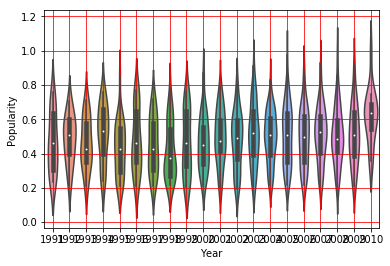

In [6]:
# General trend of numeric features of songs over past 20 years


df1 = df.select('Popularity', 'Loudness', 'ArtistHotness', 'ArtistFamiliarity', 'Year').filter(df['Year'] > 1990)
df1.show()

pandas_df = df1.toPandas()

print("--------------------------------------")

fig, axes = plt.subplots()

ax1 = sns.violinplot(x="Year", y="Popularity", data=pandas_df, inner="box")
ax1.grid(True, color="r")


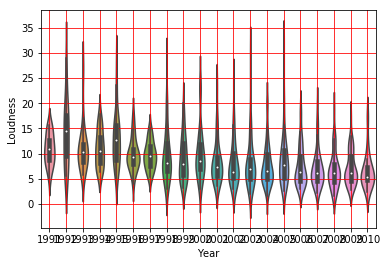

In [7]:
ax2 = sns.violinplot(x="Year", y="Loudness", data=pandas_df, inner="box")
ax2.grid(True, color="r")


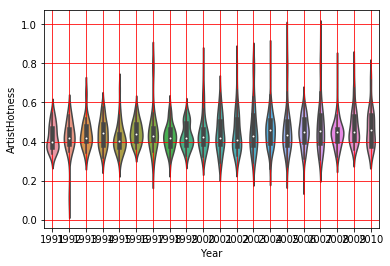

In [8]:
ax3 = sns.violinplot(x="Year", y="ArtistHotness", data=pandas_df, inner="box")
ax3.grid(True, color="r")


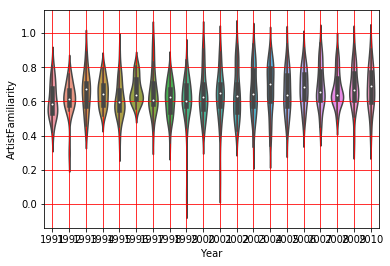

In [9]:

ax4 = sns.violinplot(x="Year", y="ArtistFamiliarity", data=pandas_df, inner="box")
ax4.grid(True, color="r")